# MNIST 手写数字识别
![1.jpg](https://www.cntk.ai/jup/cntk103d_convonly2.png)

## CNN神经卷积网路简介¶ ¶

### 步骤1：神经卷积网路介绍

CNN卷积神经网路可以分成两大部分：

* 影像的特征提取：透过Convolution与Max Pooling提取影像特征。
* 完全连接的前馈网络：展平图层，隐藏图层和输出图层
![2.jpg](https://2.bp.blogspot.com/-lo4ANmafiQM/WVpEeo68VPI/AAAAAAAAWxE/7FJBUGp-GrQFL5fUYEg6tQAJWXUHrtgWgCLcBGAs/s1600/3812_1.png)

### 步骤2：卷积神经网络运算

卷积运算的原理是将一个影像透过卷积运算的Filter weight（s）产生多个影像，在上面第一层的卷积为例：

1.先以随机方式产生16个3x3的filter
2.要转换的影像由左而右，由上而下透过过滤器重量产生新影像的值
3.使用16个filter重量产生16个channelc层
![3.jpg](https://4.bp.blogspot.com/-65gO4Ylb-pU/WVpEj04De1I/AAAAAAAAWxI/Y3wX2OYjzJYddDYCaH24-Swmhj7Q9U8iACLcBGAs/s1600/3591_1.PNG)


### 步骤3：池化运算

![4.jpg](https://4.bp.blogspot.com/-HCaeeLJ9PSI/WVpEpg-qWiI/AAAAAAAAWxM/v4Qg8BAHuxAaC9Eoe2JZWY8jdt_vyCy8gCLcBGAs/s1600/3591_2.PNG)

池化的好处:
* 减少需要处理的资料点：减少后续运算所需时间。
* 让影像位置的差异变小：例如手写数字7，位置上下左右可能不同，但是位置不同可能影响辨识。减少影像大小让数字的位置差异变小。
* 参数的数量和计算量下降：这在一定程度上也控制了Overfitting的状况。 

# 准备训练及测试数据
CNN（卷积神经网络）与MLP进行资料的前处理方式有所不同，说明如下：

* MLP：图像重塑（60000，784）：MLP因为直接送进神经元处理，所以60,000笔的每一笔图像（28x28）转换为784个神经元输入。
* CNN：image reshape（60000,28,28,1）：CNN因为必须先进卷积与池化（Max-Pool）运算，所以必须保留图像的维度。因此60,000图像每一笔图像（28x28）转换成28（height）x 28（width）x 1（channel）的单位。

In [7]:
from keras.datasets import mnist  
from keras.utils import np_utils  
import numpy as np

np.random.seed(10)  
  
# Read MNIST data  
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()  
  
# Translation of data  
X_Train4D = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')  
X_Test4D = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')
# Standardize feature data  
X_Train4D_norm = X_Train4D / 255  
X_Test4D_norm = X_Test4D /255  
  
# Label Onehot-encoding  
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)
print("y_train:%s" % y_Train[0:5])
print("onehot之后:%s" % y_TrainOneHot[0:5])

y_train:[5 0 4 1 9]
onehot之后:[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# 建立神经网络

In [1]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D 

model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu',
                 name='conv2d_1')) 
# Create Max-Pool 1  
model.add(MaxPool2D(pool_size=(2,2), name='max_pooling2d_1'))  
  
# Create CN layer 2  
model.add(Conv2D(filters=36,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu',
                 name='conv2d_2'))  
  
# Create Max-Pool 2  
model.add(MaxPool2D(pool_size=(2,2), name='max_pooling2d_2'))  
  
# Add Dropout layer  
model.add(Dropout(0.25, name='dropout_1'))
model.add(Flatten(name='flatten_1'))
model.add(Dense(128, activation='relu', name='dense_1'))  
model.add(Dropout(0.5, name='dropout_2'))
model.add(Dense(10, activation='softmax', name='dense_2'))
model.summary()  
print("")  

/Users/tianling/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

# 进行训练

In [8]:
# 定义训练方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  
# 开始训练  
train_history = model.fit(x=X_Train4D_norm,  
                          y=y_TrainOneHot, validation_split=0.2,  
                          epochs=10, batch_size=300, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 33s 679us/step - loss: 0.4823 - acc: 0.8495 - val_loss: 0.0950 - val_acc: 0.9714
Epoch 2/10
48000/48000 [==============================] - 35s 723us/step - loss: 0.1335 - acc: 0.9610 - val_loss: 0.0646 - val_acc: 0.9798
Epoch 3/10
48000/48000 [==============================] - 33s 689us/step - loss: 0.0975 - acc: 0.9707 - val_loss: 0.0513 - val_acc: 0.9833
Epoch 4/10
48000/48000 [==============================] - 33s 682us/step - loss: 0.0776 - acc: 0.9767 - val_loss: 0.0459 - val_acc: 0.9859
Epoch 5/10
48000/48000 [==============================] - 32s 675us/step - loss: 0.0668 - acc: 0.9799 - val_loss: 0.0410 - val_acc: 0.9877
Epoch 6/10
48000/48000 [==============================] - 32s 673us/step - loss: 0.0562 - acc: 0.9828 - val_loss: 0.0356 - val_acc: 0.9893
Epoch 7/10
48000/48000 [==============================] - 33s 679us/step - loss: 0.0519 - acc: 0.9839 - val_loss: 0.

# 画出accuracy执行结果
之前的训练步骤产生的准确性与损失都会记录在train_history变数。

In [11]:
import matplotlib.pyplot as plt  
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')  
    plt.show()  

def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  

def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 

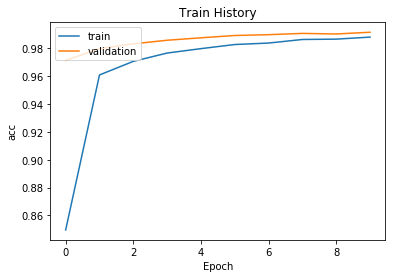

In [13]:
show_train_history(train_history, 'acc', 'val_acc')

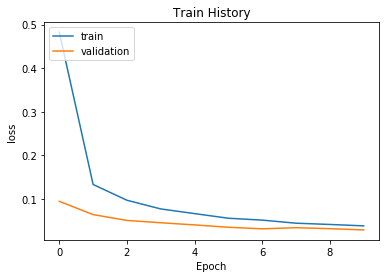

In [14]:
show_train_history(train_history, 'loss', 'val_loss')

# 评估模型准确率并进行预测
我们已经完成了训练，接下来使用test测试资料集来进行评估准确率

## 评估模型准确率

In [15]:
scores = model.evaluate(X_Test4D_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

10000/10000 [==============================] - 2s 246us/step

	[Info] Accuracy of testing data = 99.2%


## 预测结果

In [16]:
print("\t[Info] Making prediction of X_Test4D_norm")  
prediction = model.predict_classes(X_Test4D_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))

	[Info] Making prediction of X_Test4D_norm

	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 4 4 2]



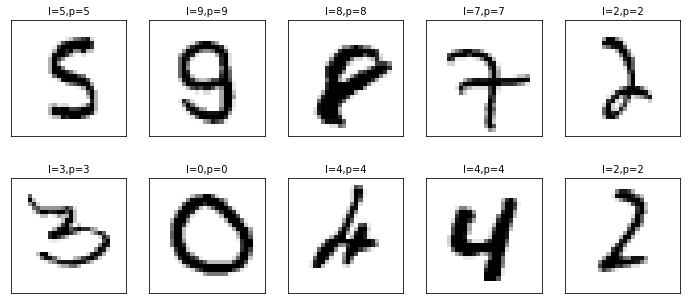

In [17]:
## 展示前10预测结果
plot_images_labels_predict(X_Test, y_Test, prediction, idx=240)